In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')
data.shape

(5391, 6)

In [4]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [6]:
data.isna().values.any()

np.False_

In [7]:
data.duplicated().values.any()

np.False_

In [8]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [10]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

In [11]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [15]:
# filter on multiple films
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [16]:
# removing unreleased films
scrape_date = pd.Timestamp('2018-5-1')


In [18]:
future_releases = data[data.Release_Date >=scrape_date]
print(f"Number of Future Releases: {len(future_releases)}")
future_releases

Number of Future Releases: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [19]:
data_clean = data.drop(future_releases.index)

In [ ]:
# Films that Lost money
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

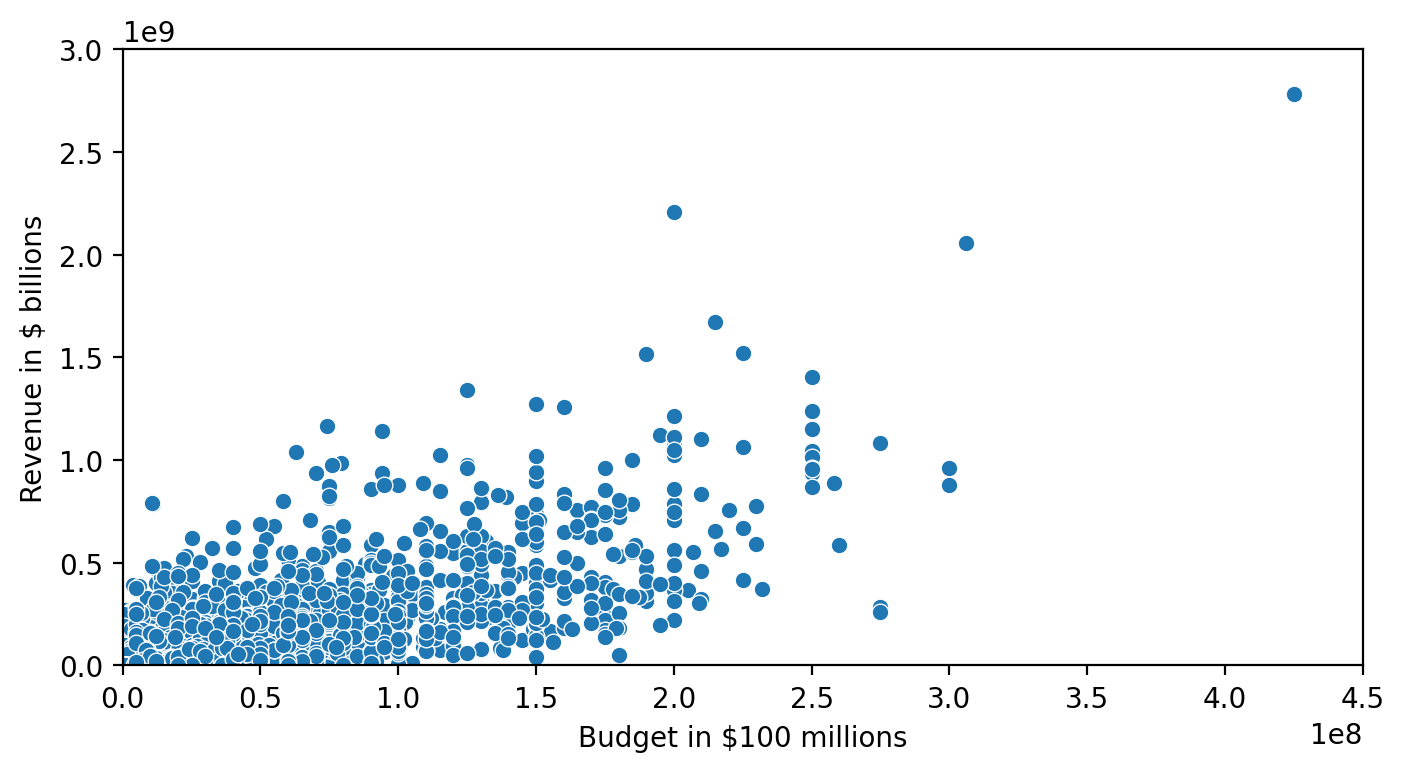

In [23]:
# Seaborn: Visualiation
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

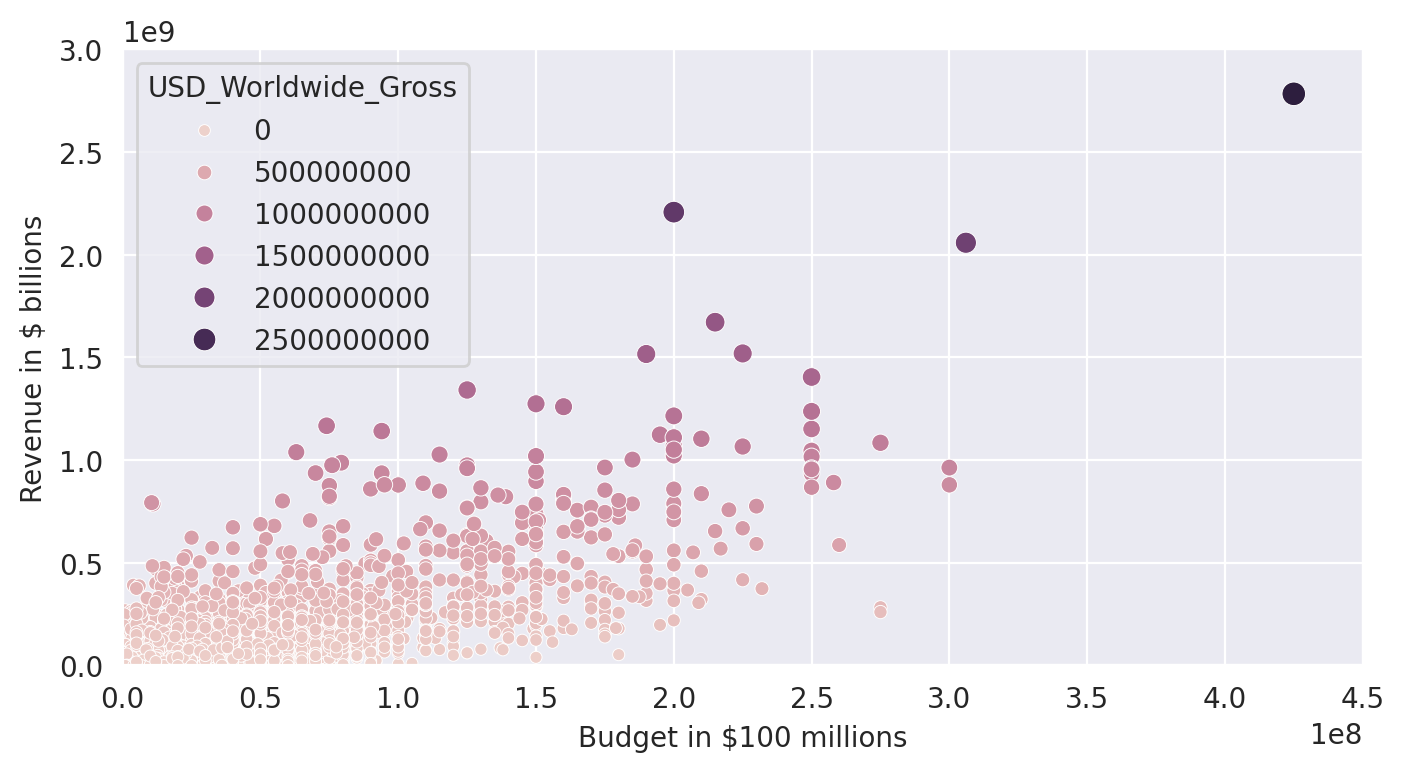

In [25]:
# bubble chart
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

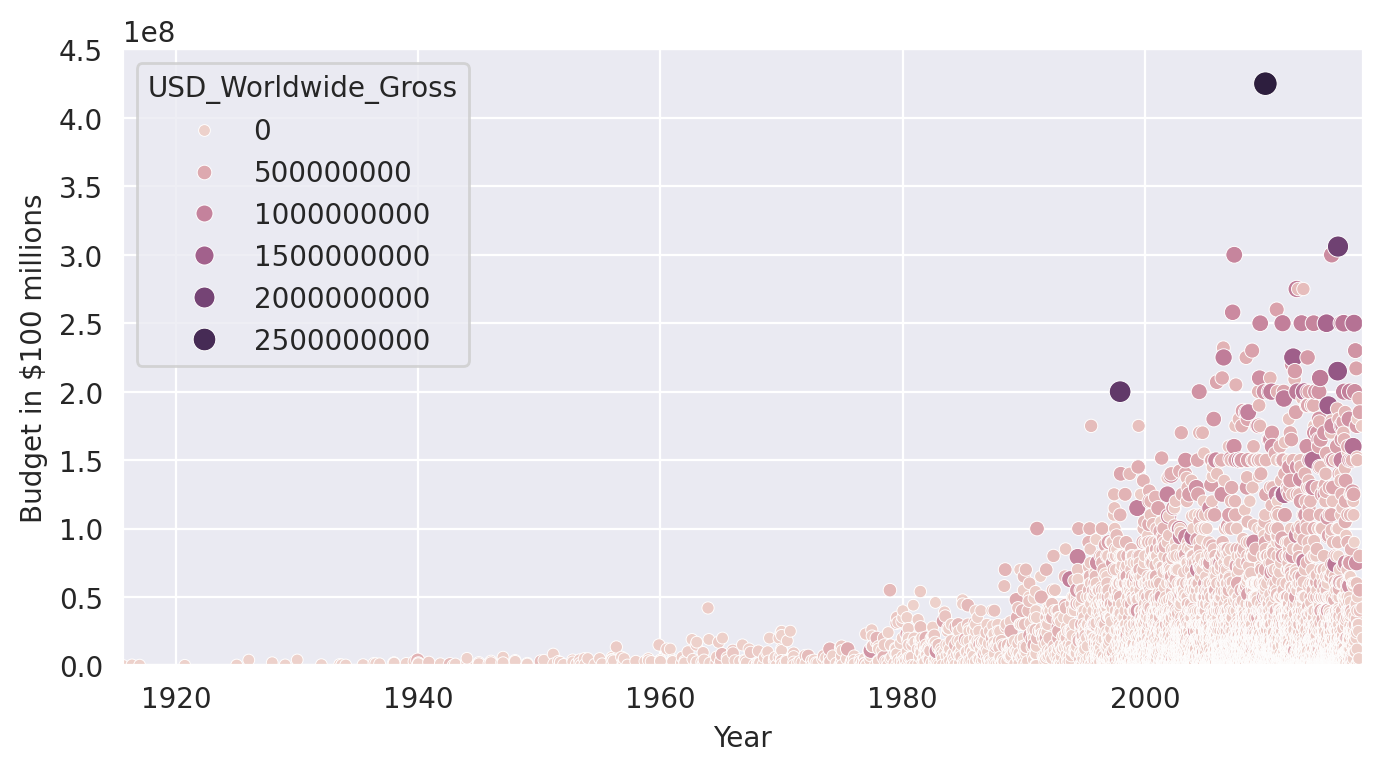

In [26]:
# movie budget over time
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 


In [27]:
# converting years to decades
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [28]:
decades = years//10*10
data_clean['Decade'] = decades


In [29]:
# films before and after 1970
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [30]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,153,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,1954-06-10 04:04:42.352941184,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
min,1253.000000,1915-08-02 00:00:00,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1946-01-01 00:00:00,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,1956-12-23 00:00:00,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,1964-10-22 00:00:00,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,1969-12-19 00:00:00,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000
std,742.137130,NaN,5.713649e+06,5.493183e+07,3.264175e+07,12.719014


In [41]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


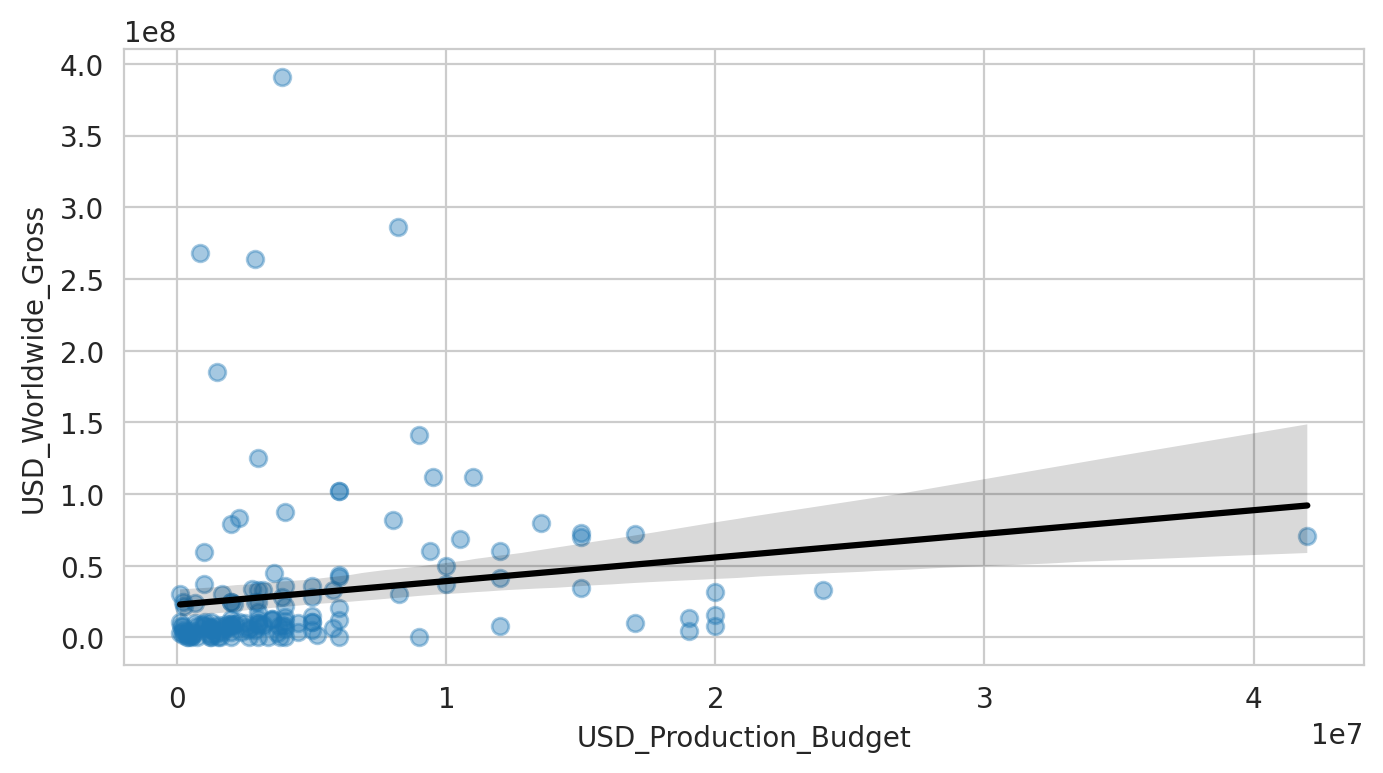

In [42]:
# Lnear Regression
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
 sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws={'alpha':0.4},
            line_kws={'color':'Black'})

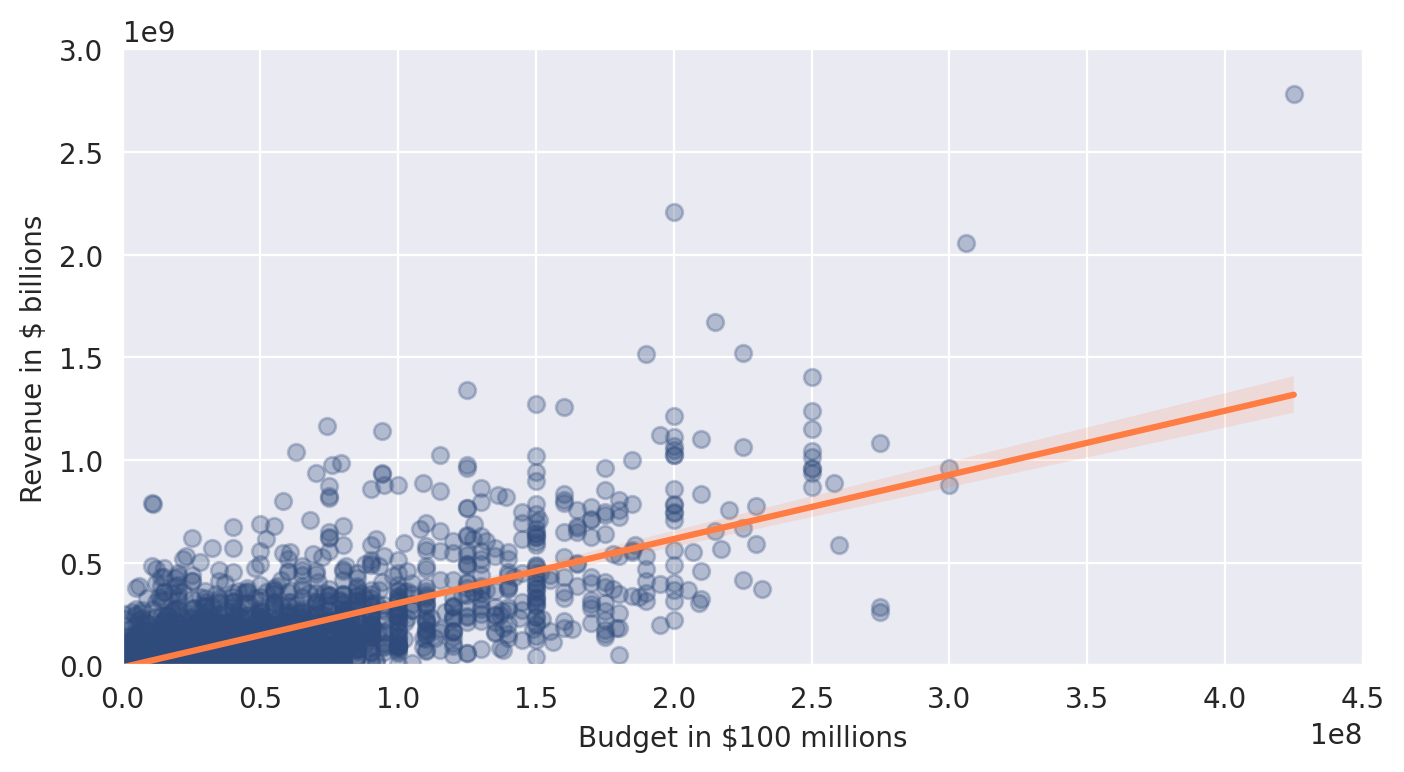

In [43]:
# Plotting regression against new films
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

In [54]:
# using scikitLearn to run own regression
regression = LinearRegression()

X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)
print(f"The Slope coefficient is: {regression.coef_[0]}")
print(f"The Intercept is: {regression.intercept_[0]}")
print(f"The R-Squared is: {regression.score(X, y)}")

The Slope coefficient is: [3.12259592]
The Intercept is: -8650768.006610245
The R-Squared is: 0.5577032617720403


In [57]:
# using model to make prediction
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f"The Revenue Estimate for $350 film is around: {revenue_estimate:.10}.")

The Revenue Estimate for $350 film is around: 1.084e+09.
